In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# New Dataframe 
data = pd.read_csv('song_data.csv', encoding='utf-8')
data.drop(columns='Unnamed: 0', inplace=True)
# data.plot('YEAR', 'COMPOUND', 'scatter')
reg_years = pd.DataFrame(pd.unique(data['YEAR']), columns=['YEAR'])
cols = ['sentiment', 'profanity total', 'Hip-Hop/Rap']
reg_features = pd.DataFrame(data = np.zeros((len(reg_years), len(cols))), columns=cols)
reg_data = pd.concat([reg_years, reg_features], axis=1)
reg_data.head(5)

,YEAR,sentiment,profanity total,Hip-Hop/Rap
0,1986,0.0,0.0,0.0
1,1987,0.0,0.0,0.0
2,1988,0.0,0.0,0.0
3,1989,0.0,0.0,0.0
4,1990,0.0,0.0,0.0


In [2]:
data.head(5)

,RANK,TITLE,ARTIST,YEAR,LYRICS,sentiment,profanity total,Hip-Hop/Rap,Not Hip-Hop/Rap
0,1,That's What Friends Are For,"Dionne and Friends (Dionne Warwick, Gladys Kni...",1986,never thought id feel way far im concerned im ...,0.9954,0,0,1
1,2,"Say You, Say Me",Lionel Richie,1986,say say say always thats way say say say toget...,0.8555,0,0,1
2,3,I Miss You,Klymaxx,1986,thought heard voice yesterday turned around sa...,0.9878,0,0,1
3,4,On My Own,Patti LaBelle and Michael McDonald,1986,many times said forever said love would always...,0.9065,0,0,1
4,5,Broken Wings,Mr. Mister,1986,baby dont understand cant hold others hands ti...,0.9927,0,0,1


In [3]:
# Fill in averages for each year for each feature 
i = 0
for year in reg_data['YEAR']:
  by_year = pd.DataFrame(data.loc[data['YEAR'] == year])
  year_data = data.loc[data['YEAR'] == year]
  for col in cols:
    if col == 'sentiment' or col == 'profanity total':
      reg_data.at[i, col] = by_year.loc[:, col].mean()
    else:
      reg_data.at[i, col] = len(by_year.loc[by_year[col]==1])
    
  i+=1

reg_data.head(10) 

,YEAR,sentiment,profanity total,Hip-Hop/Rap
0,1986,0.432379,0.453608,0.0
1,1987,0.571931,0.051020,1.0
2,1988,0.511390,0.072917,1.0
3,1989,0.483670,0.295918,4.0
4,1990,0.609106,0.525773,9.0
5,1991,0.714969,0.454545,8.0
6,1992,0.493057,0.565657,13.0
7,1993,0.485563,1.428571,18.0
8,1994,0.479754,1.870000,18.0
9,1995,0.487975,2.383838,16.0


## Preliminary Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


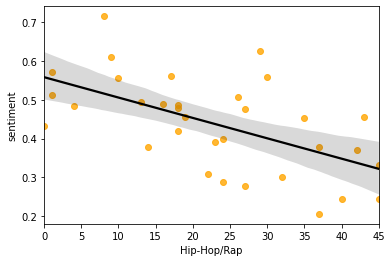

In [104]:
import seaborn as sns
# sns.regplot(reg_data['profanity total'], reg_data['sentiment'], scatter_kws={"color": "orange"}, line_kws={"color": "black"})
# sns.regplot(reg_data['YEAR'], reg_data['sentiment'], scatter_kws={"color": "orange"}, line_kws={"color": "black"})
sns.regplot(reg_data['Hip-Hop/Rap'], reg_data['sentiment'], scatter_kws={"color": "orange"}, line_kws={"color": "black"})
# sns.regplot(reg_data['Not Hip-Hop/Rap'], reg_data['sentiment'], scatter_kws={"color": "orange"}, line_kws={"color": "black"})



## Regression Analysis

In [117]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error

# Train/Test Split
train_set, test_set = train_test_split(reg_data, test_size=0.25)
x_train = pd.concat([train_set.loc[:, 'YEAR'], train_set.iloc[:, 2:]], axis=1)
y_train = train_set.loc[:, 'sentiment']
x_test = pd.concat([test_set.loc[:, 'YEAR'], test_set.iloc[:, 2:]], axis=1)
y_test = test_set.loc[:, 'sentiment']

In [118]:
# Ordinary Least Squares Linear Regression
ols = LinearRegression().fit(x_train, y_train)
ols.score(x_test, y_test)
y_pred = ols.predict(x_test)
y_pred_train = ols.predict(x_train)

print("OLS RESULTS: \n")
print("Train R-squared: ", r2_score(y_train, y_pred_train))
print("Test R-squared: ", r2_score(y_test, y_pred))

print("Train Mean Squared Error(MSE): ", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error(MSE): ", mean_squared_error(y_test, y_pred))

print("Train Mean Absolute Error(MAE): ", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error(MAE): ", mean_absolute_error(y_test, y_pred))

print("Train Explained Variance Score: ", explained_variance_score(y_train, y_pred_train))
print("Test Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print('\n')


# Ridge Regression w/ CV
ridge = RidgeCV().fit(x_train, y_train)
ridge.score(x_test, y_test)
y_pred = ridge.predict(x_test)
y_pred_train = ridge.predict(x_train)

print("RIDGE RESULTS: \n")
print("Train R-squared: ", r2_score(y_train, y_pred_train))
print("Test R-squared: ", r2_score(y_test, y_pred))

print("Train Mean Squared Error(MSE): ", mean_squared_error(y_train, y_pred_train))
print("Test Mean Squared Error(MSE): ", mean_squared_error(y_test, y_pred))

print("Train Mean Absolute Error(MAE): ", mean_absolute_error(y_train, y_pred_train))
print("Test Mean Absolute Error(MAE): ", mean_absolute_error(y_test, y_pred))

print("Train Explained Variance Score: ", explained_variance_score(y_train, y_pred_train))
print("Test Explained Variance Score: ", explained_variance_score(y_test, y_pred))
print('\n')

OLS RESULTS: 

Train R-squared:  0.5020151785691426
Test R-squared:  0.5801058512212083
Train Mean Squared Error(MSE):  0.0058815392626459856
Test Mean Squared Error(MSE):  0.007122918635371047
Train Mean Absolute Error(MAE):  0.06175586547408831
Test Mean Absolute Error(MAE):  0.0676579198735462
Train Explained Variance Score:  0.5020151785691426
Test Explained Variance Score:  0.6180242161307997


RIDGE RESULTS: 

Train R-squared:  0.49510997439490767
Test R-squared:  0.5138745649295416
Train Mean Squared Error(MSE):  0.0059630944179831615
Test Mean Squared Error(MSE):  0.008246440038904677
Train Mean Absolute Error(MAE):  0.06183018696874162
Test Mean Absolute Error(MAE):  0.07607286731484698
Train Explained Variance Score:  0.49510997439490767
Test Explained Variance Score:  0.5541385215667871




In [119]:
coef = np.concatenate((ols.coef_.reshape((3,1)), ridge.coef_.reshape((3,1))), axis=1)

coef = np.concatenate((coef, np.array([ols.intercept_, ridge.intercept_]).reshape((1,2))), axis=0)

indices = list(x_train.columns)
indices.append("CONST")

coefficients = pd.DataFrame(data=coef, index=indices, columns=['OLS', 'RIDGE'])
coefficients

,OLS,RIDGE
YEAR,-0.001531,-0.002729
profanity total,-0.030255,-0.020536
Hip-Hop/Rap,-0.000153,-0.000852
CONST,3.618809,6.000766
